<a href="https://colab.research.google.com/github/JA2PYC/ja2pyc_green_python/blob/ch14/ch14/tensorflowKeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Tensorflow and Keras
# Import Data Library
import numpy as np
import pandas as pd

# Import Graph Library
import matplotlib.pyplot as plt
import seaborn as sb

# Import Deep Learning Library
import tensorflow as tf
import keras as kr

In [5]:
from google.colab import drive
drive.mount('/content/drive')

# !mkdir -p /content/drive/MyDrive/Github/
# %cd /content/drive/MyDrive/Github/
# !git clone https://github.com/JA2PYC/ja2pyc_green_python.git

Mounted at /content/drive


In [8]:
# Set Data Frame
# data_df = pd.read_excel('/content/ja2pyc_green_python/ch14/data/사과배-학습.xlsx')
data_df = pd.read_excel('/content/drive/MyDrive/Github/ja2pyc_green_python/ch14/data/사과배-학습.xlsx')
print (data_df.info())

# Fill Nan Data
filled_data = data_df.fillna(0)
print (filled_data.isna().sum())

# Convert Data
converted_data = filled_data.copy()
convert_map = {'사과' : 0, '배' : 1}
converted_data['fruit'] = converted_data['fruit'].map(convert_map)
print (converted_data.info())
data_train = converted_data.iloc[:, 1:]
data_label = converted_data.iloc[:, 0]
print (data_train.info(), data_label.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fruit     95 non-null     object 
 1   weight    95 non-null     float64
 2   height    95 non-null     float64
 3   width     95 non-null     float64
 4   hardness  95 non-null     float64
 5   sweet     95 non-null     float64
 6   sour      95 non-null     float64
 7   color     61 non-null     float64
dtypes: float64(7), object(1)
memory usage: 6.1+ KB
None
fruit       0
weight      0
height      0
width       0
hardness    0
sweet       0
sour        0
color       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fruit     95 non-null     int64  
 1   weight    95 non-null     float64
 2   height    95 non-null     float64
 3   width     95 non-null   

In [9]:
# Sequential Model
tf.random.set_seed(0)
seq_model = kr.models.Sequential()
seq_model.add(kr.layers.Dense(units = 6, input_shape =(7,), activation = 'relu'))
seq_model.add(kr.layers.Dense(units = 3, activation = 'relu'))
seq_model.add(kr.layers.Dense(units = 1, activation = 'sigmoid'))
seq_model

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


<Sequential name=sequential, built=True>

In [10]:
# Compile Model
seq_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])
seq_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 6)                   │              48 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │              21 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 73 (292.00 B)

 Trainable params: 73 (292.00 B)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Training Model
train_history = seq_model.fit(data_train, data_label, epochs=50)
print (train_history)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6101 - loss: 34.0567
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6101 - loss: 32.5355 
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6101 - loss: 31.0409 
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6101 - loss: 29.5637 
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6101 - loss: 28.1034 
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6101 - loss: 26.6636 
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6101 - loss: 25.2415 
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6101 - loss: 23.8365 
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6101 - loss: 22.4487 
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6101 - loss: 21.0778 
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6101 - loss: 19.7238 
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6101 - loss:

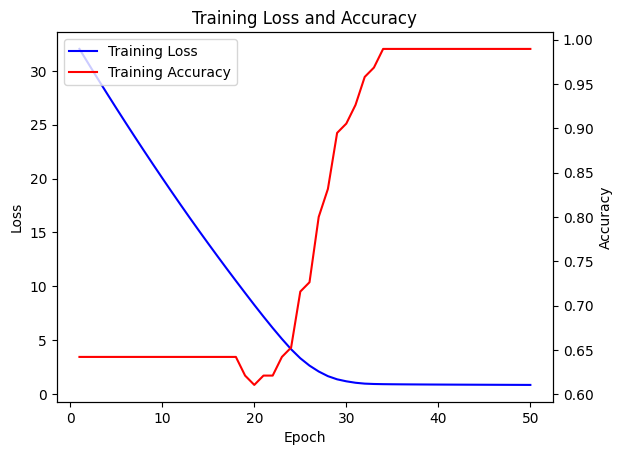

In [16]:
history_loss = train_history.history['loss']
history_acc = train_history.history['accuracy']
history_epoch = range(1, len(history_loss) + 1)
plt.title('Training Loss and Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(history_epoch, history_loss, 'b', label='Training Loss')
ax_lines, ax_labels = plt.gca().get_legend_handles_labels()

ax_twinx = plt.twinx()
ax_twinx.set_ylabel('Accuracy')
plt.plot(history_epoch, history_acc, 'r', label='Training Accuracy')
ax_twinx_lines, ax_twinx_labels = ax_twinx.get_legend_handles_labels()
plt.legend(ax_lines + ax_twinx_lines, ax_labels + ax_twinx_labels)
plt.show()

In [14]:
history_epoch = range(1, len(history_loss) + 1)
print (history_loss)
print (len(history_loss))
print(history_epoch)

[32.03916549682617, 30.6357479095459, 29.254718780517578, 27.889657974243164, 26.540189743041992, 25.20863151550293, 23.89329719543457, 22.593910217285156, 21.310413360595703, 20.042675018310547, 18.790494918823242, 17.5535831451416, 16.33351707458496, 15.135184288024902, 13.952917098999023, 12.784486770629883, 11.63200569152832, 10.49605941772461, 9.37134838104248, 8.258970260620117, 7.172603607177734, 6.1158766746521, 5.100842475891113, 4.140880584716797, 3.30267596244812, 2.619288921356201, 2.0720832347869873, 1.640493631362915, 1.3459349870681763, 1.1607969999313354, 1.026383638381958, 0.9453451037406921, 0.9124112725257874, 0.8958871960639954, 0.8867157101631165, 0.8792515993118286, 0.8730214238166809, 0.8676875233650208, 0.8630043268203735, 0.8587924242019653, 0.8549200892448425, 0.8512901663780212, 0.8478308320045471, 0.8444902300834656, 0.8412288427352905, 0.8380187749862671, 0.8348383903503418, 0.8316730856895447, 0.8285111784934998, 0.8253445029258728]
50
range(1, 51)
